In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import joblib

In [4]:
df = pd.read_csv('sales.csv')
df.head()

,Marketing_Spend,Store_Size,Month_Number,Competitor_Price_Index,Holiday_Flag,Sales
0,20795,302,6,0.99,0,158101
1,5860,291,2,0.91,1,87796
2,43158,84,8,1.02,1,219061
3,49732,264,8,0.86,0,299134
4,16284,386,1,1.14,1,137693


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Marketing_Spend         500 non-null    int64  
 1   Store_Size              500 non-null    int64  
 2   Month_Number            500 non-null    int64  
 3   Competitor_Price_Index  500 non-null    float64
 4   Holiday_Flag            500 non-null    int64  
 5   Sales                   500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [6]:
feature_cols = ['Marketing_Spend', 'Store_Size', 'Competitor_Price_Index']
x = df[feature_cols]
x

,Marketing_Spend,Store_Size,Competitor_Price_Index
0,20795,302,0.99
1,5860,291,0.91
2,43158,84,1.02
3,49732,264,0.86
4,16284,386,1.14
...,...,...,...
495,48404,158,1.20
496,25491,195,1.10
497,43494,160,0.84
498,8373,277,0.92


In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.42935538,  0.25069994, -0.08971364],
       [-1.54374764,  0.16577972, -0.77065204],
       [ 1.23928568, -1.4322645 ,  0.16563827],
       ...,
       [ 1.26435671, -0.84554295, -1.36647315],
       [-1.35623725,  0.05769943, -0.68553474],
       [-0.70051048, -0.84554295, -1.36647315]], shape=(500, 3))

In [8]:
k_range = range(1, 10)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

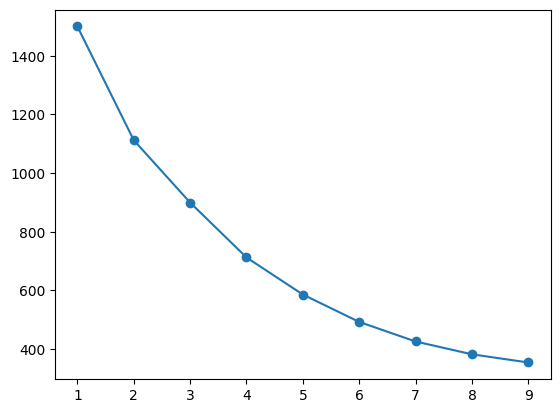

In [9]:
plt.plot(k_range, sse, marker='o')

In [10]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)
df.head(25) 

,Marketing_Spend,Store_Size,Month_Number,Competitor_Price_Index,Holiday_Flag,Sales,Cluster
0,20795,302,6,0.99,0,158101,1
1,5860,291,2,0.91,1,87796,1
2,43158,84,8,1.02,1,219061,2
3,49732,264,8,0.86,0,299134,2
4,16284,386,1,1.14,1,137693,3
5,11265,139,12,1.14,1,32552,0
6,21850,313,3,1.18,0,99867,3
7,42194,142,10,0.86,1,220480,2
8,26962,459,9,1.05,0,213987,3
9,49131,139,5,0.99,0,265244,2


In [11]:
cluster_perfomance = df.groupby('Cluster')['Sales'].mean().sort_values()
cluster_perfomance

Cluster
0     92655.353535
1    147042.129032
3    210868.582090
2    218216.153846
Name: Sales, dtype: float64

In [12]:
category_names = {0: 'Low Value', 1: 'Emerging', 2: 'Core', 3: 'High Value'}
category_names

{0: 'Low Value', 1: 'Emerging', 2: 'Core', 3: 'High Value'}

In [13]:
cluster_labels = {}
for i, cluster_id in enumerate(cluster_perfomance.index):
    cluster_labels[cluster_id] = category_names[i]

In [14]:
cluster_labels

{0: 'Low Value', 1: 'Emerging', 3: 'Core', 2: 'High Value'}

In [15]:
df['store_category'] = df['Cluster'].map(cluster_labels)
df

,Marketing_Spend,Store_Size,Month_Number,Competitor_Price_Index,Holiday_Flag,Sales,Cluster,store_category
0,20795,302,6,0.99,0,158101,1,Emerging
1,5860,291,2,0.91,1,87796,1,Emerging
2,43158,84,8,1.02,1,219061,2,High Value
3,49732,264,8,0.86,0,299134,2,High Value
4,16284,386,1,1.14,1,137693,3,Core
...,...,...,...,...,...,...,...,...
495,48404,158,7,1.20,1,253307,3,Core
496,25491,195,8,1.10,0,163832,0,Low Value
497,43494,160,6,0.84,0,268791,2,High Value
498,8373,277,6,0.92,0,87259,1,Emerging


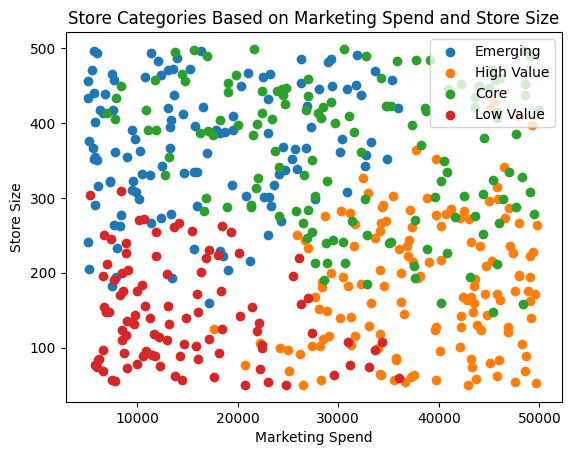

In [16]:
for category in df['store_category'].unique():
   data_category = df[df['store_category'] == category]
   plt.scatter(data_category['Marketing_Spend'], data_category['Store_Size'], label=category)
plt.legend()
plt.xlabel('Marketing Spend')
plt.ylabel('Store Size')
plt.title('Store Categories Based on Marketing Spend and Store Size')
plt.show()

In [ ]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(kmeans, 'kmeans.joblib')
joblib.dump(feature_cols, 'features.joblib')
joblib.dump(cluster_labels, 'labels.joblib')

['labels.joblib']